In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = r"C:\Users\USER\OneDrive\Desktop\disease detection\Train\Train\Healthy"
train_files_powdery =r"C:\Users\USER\OneDrive\Desktop\disease detection\Train\Train\Powdery"
train_files_rust = r"C:\Users\USER\OneDrive\Desktop\disease detection\Train\Train\Rust"

test_files_healthy = r"C:\Users\USER\OneDrive\Desktop\disease detection\Test\Test\Healthy"
test_files_powdery = r"C:\Users\USER\OneDrive\Desktop\disease detection\Test\Test\Powdery"
test_files_rust = r"C:\Users\USER\OneDrive\Desktop\disease detection\Test\Test\Rust"

valid_files_healthy =r"C:\Users\USER\OneDrive\Desktop\disease detection\Validation\Validation\Healthy"
valid_files_powdery = r"C:\Users\USER\OneDrive\Desktop\disease detection\Validation\Validation\Powdery"
valid_files_rust = r"C:\Users\USER\OneDrive\Desktop\disease detection\Validation\Validation\Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 459
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 51
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 21
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


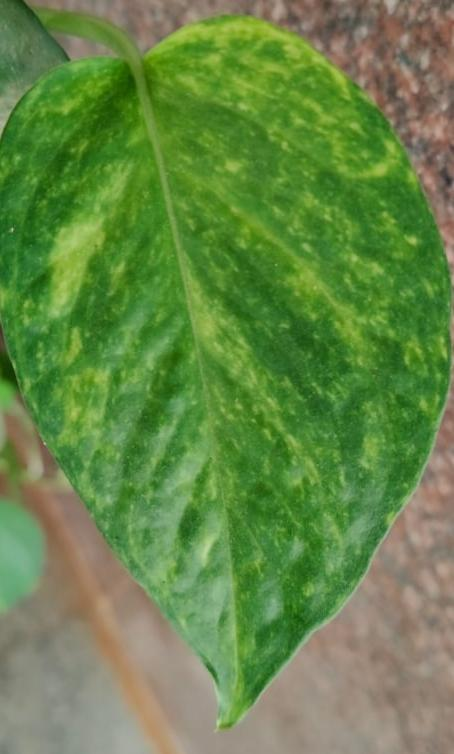

In [7]:
from PIL import Image
import IPython.display as display

image_path = r"C:\Users\USER\OneDrive\Desktop\disease detection\Train\Train\Healthy\smv leaf1.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

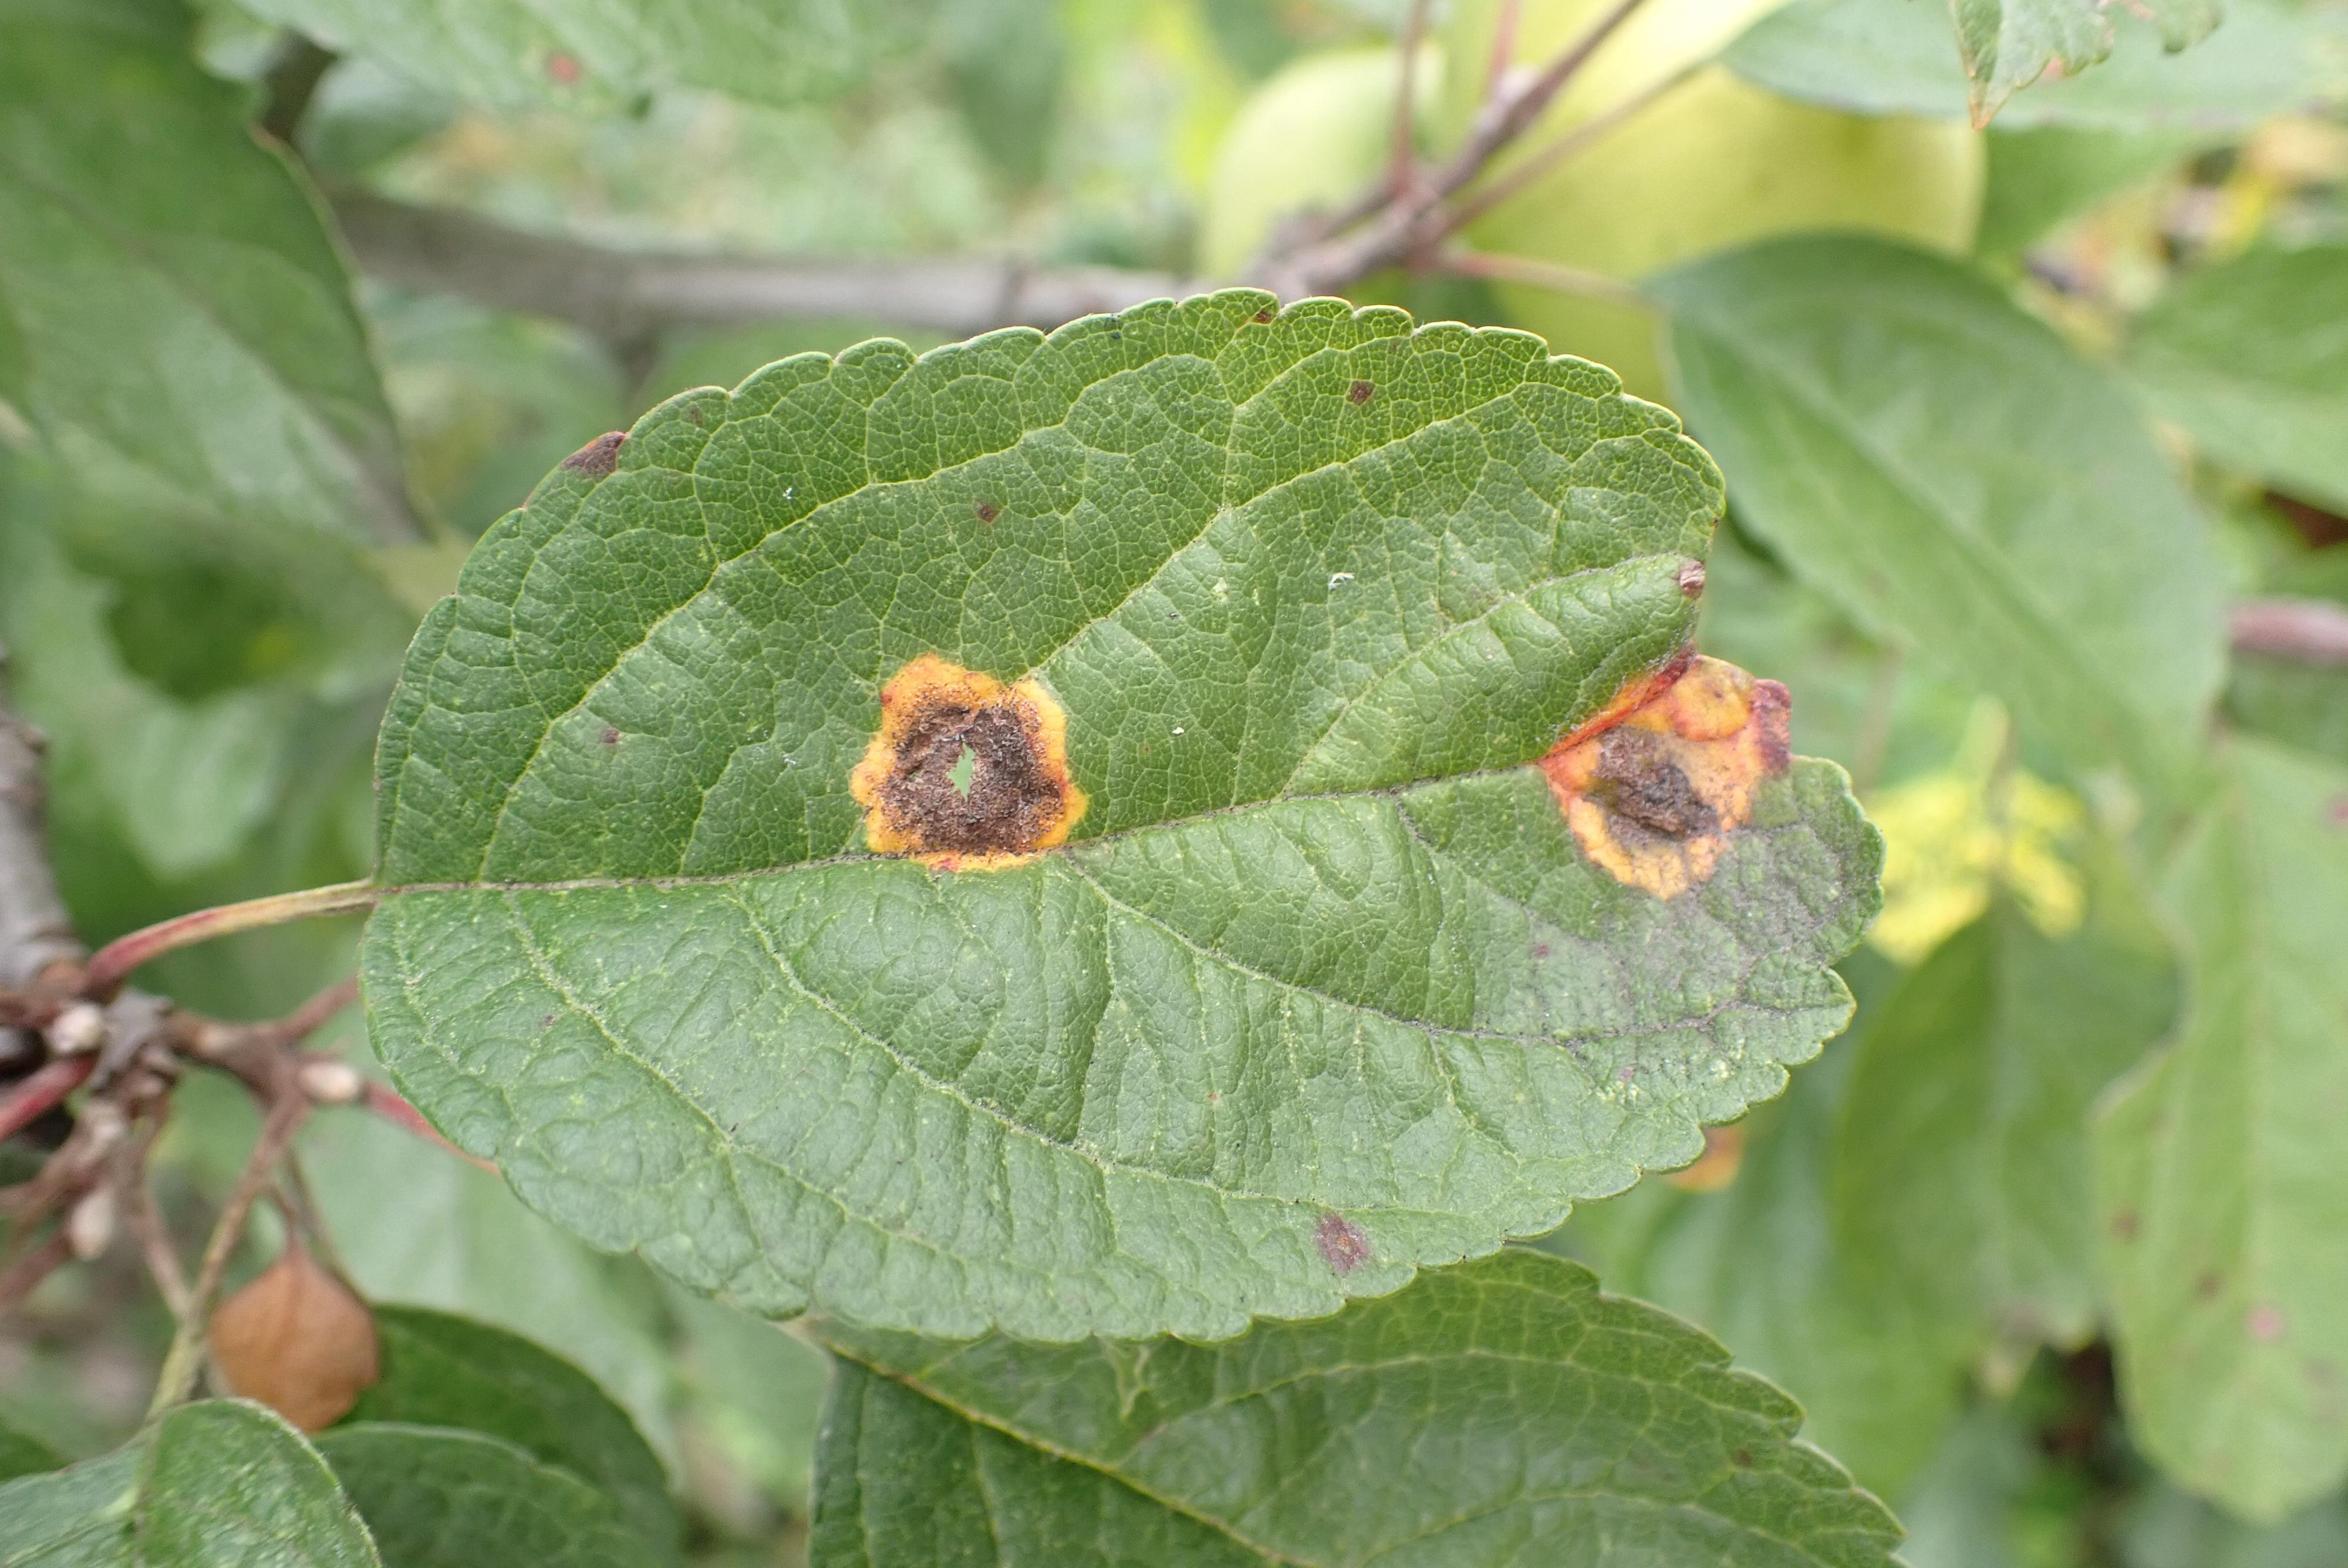

In [8]:
image_path = r"C:\Users\USER\OneDrive\Desktop\disease detection\Train\Train\Rust\8a954b82bf81f2bc.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [9]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


ModuleNotFoundError: No module named 'tensorflow'

In [7]:
train_generator = train_datagen.flow_from_directory(r"C:\Users\USER\OneDrive\Desktop\disease detection\Train\Train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\USER\OneDrive\Desktop\disease detection\Validation\Validation",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [8]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the Sequential model
model = Sequential()

# Add an explicit Input layer to define the input shape
model.add(Input(shape=(225, 225, 3)))

# Add the convolutional and pooling layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(64, activation='relu'))

# Output layer with softmax activation (for multi-class classification)
model.add(Dense(3, activation='softmax'))

# Print model summary to verify the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 223, 223, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,963,587 (45.64 MB)

 Trainable params: 11,963,587 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4280 - loss: 2.8868

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 254s 6s/step - accuracy: 0.4301 - loss: 2.8555 - val_accuracy: 0.5500 - val_loss: 0.8098
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 218s 5s/step - accuracy: 0.7704 - loss: 0.5340 - val_accuracy: 0.8667 - val_loss: 0.4011
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 205s 5s/step - accuracy: 0.8864 - loss: 0.3475 - val_accuracy: 0.8500 - val_loss: 0.4153
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.9231 - loss: 0.2314 - val_accuracy: 0.8667 - val_loss: 0.4432
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 210s 5s/step - accuracy: 0.9166 - loss: 0.2330 - val_accuracy: 0.8500 - val_loss: 0.3924


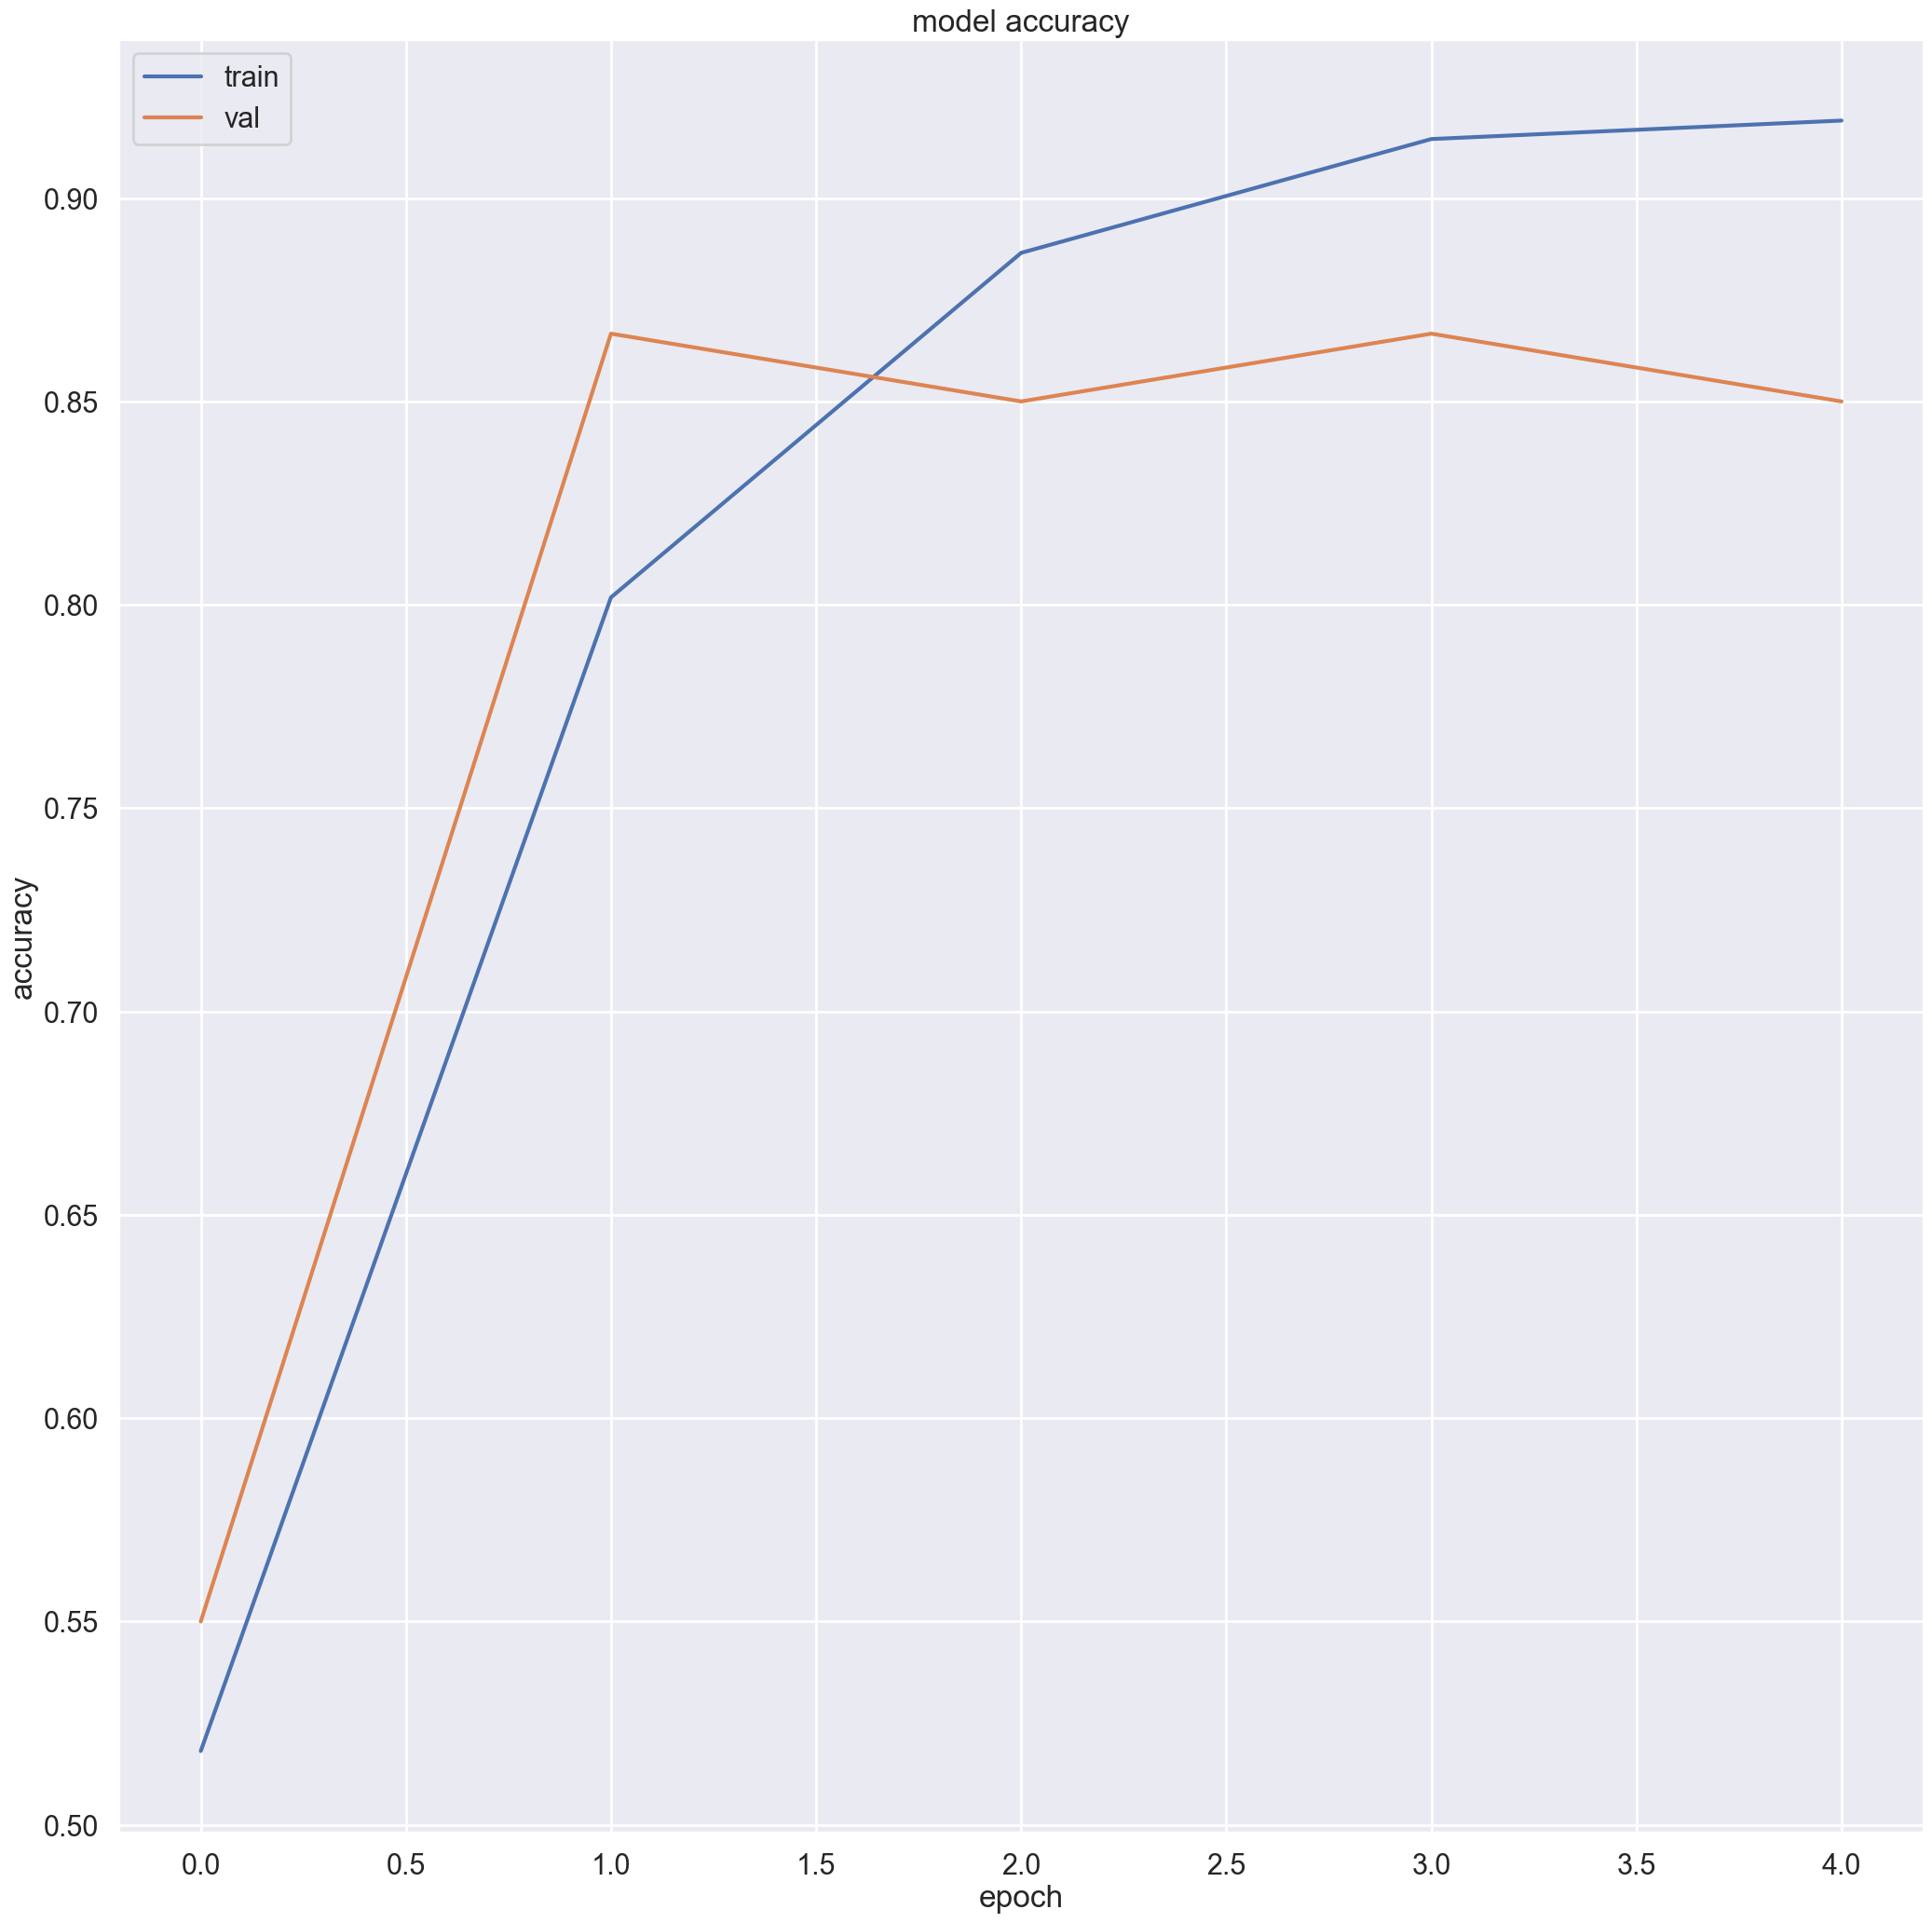

In [11]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
# Saving the model in the new Keras format
model.save("model.keras")


NameError: name 'model' is not defined

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\USER\OneDrive\Desktop\disease detection\Train\Train\Healthy\smv leaf1.jpg")

ModuleNotFoundError: No module named 'tensorflow'

In [20]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([9.7696233e-01, 1.7649500e-06, 2.3035856e-02], dtype=float32)

In [21]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [22]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Healthy
